<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826312 sha256=13a37761d97bb976d835590cabbcfebbafe492530784bd10903eac480a690437
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437405 sha256=2bd9f6163f85faeadbea54f9c79cfec21fa8e1f2f692a47fe9d59cfa70f69a05
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [416]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60", count=380)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-03-28 20:30:00  35602000.0  35923000.0  35553000.0  35802000.0   
2023-03-28 21:00:00  35802000.0  35989000.0  35583000.0  35595000.0   
2023-03-28 21:30:00  35595000.0  35813000.0  35580000.0  35751000.0   
2023-03-28 22:00:00  35736000.0  35820000.0  35622000.0  35700000.0   
2023-03-28 22:30:00  35701000.0  35826000.0  35639000.0  35649000.0   
...                         ...         ...         ...         ...   
2023-04-10 09:30:00  37475000.0  37615000.0  37450000.0  37568000.0   
2023-04-10 10:00:00  37568000.0  37569000.0  37416000.0  37423000.0   
2023-04-10 10:30:00  37424000.0  37545000.0  37421000.0  37503000.0   
2023-04-10 11:00:00  37504000.0  37514000.0  37461000.0  37470000.0   
2023-04-10 11:30:00  37470000.0  37515000.0  37469000.0  37513000.0   

                         volume         value  
2023-03-28 20:30:00  171.050778  6.114673e+09  
2023-03-28 21:00:00  187.330015  6.711990e+09  
202

In [417]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-28 20:30:00,35802000.0
1,2023-03-28 21:00:00,35595000.0
2,2023-03-28 21:30:00,35751000.0
3,2023-03-28 22:00:00,35700000.0
4,2023-03-28 22:30:00,35649000.0
...,...,...
595,2023-04-10 09:30:00,37568000.0
596,2023-04-10 10:00:00,37423000.0
597,2023-04-10 10:30:00,37503000.0
598,2023-04-10 11:00:00,37470000.0


In [418]:
#prophet 불러옴
from fbprophet import Prophet

In [419]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [420]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=55, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


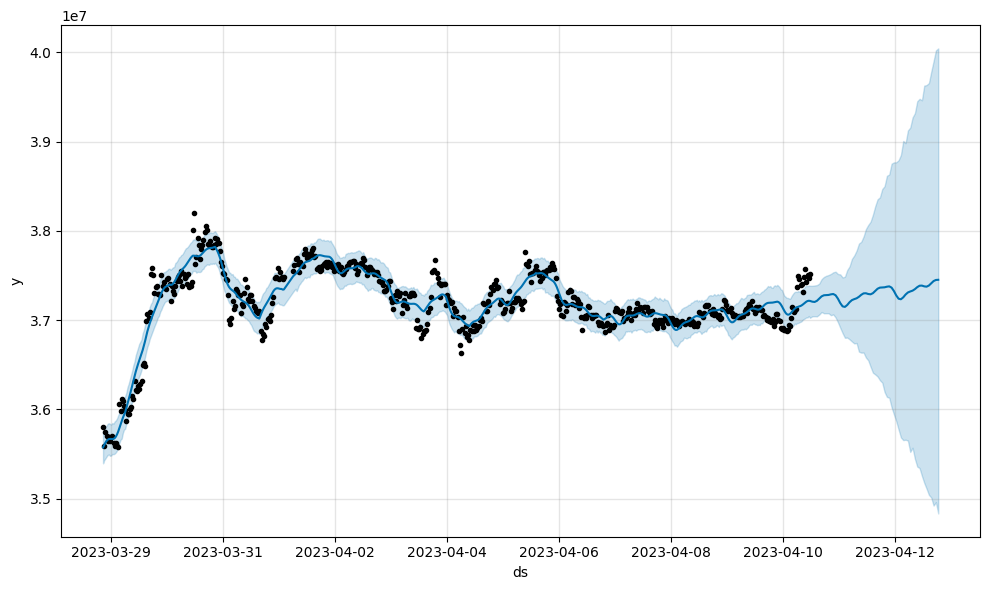

In [421]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


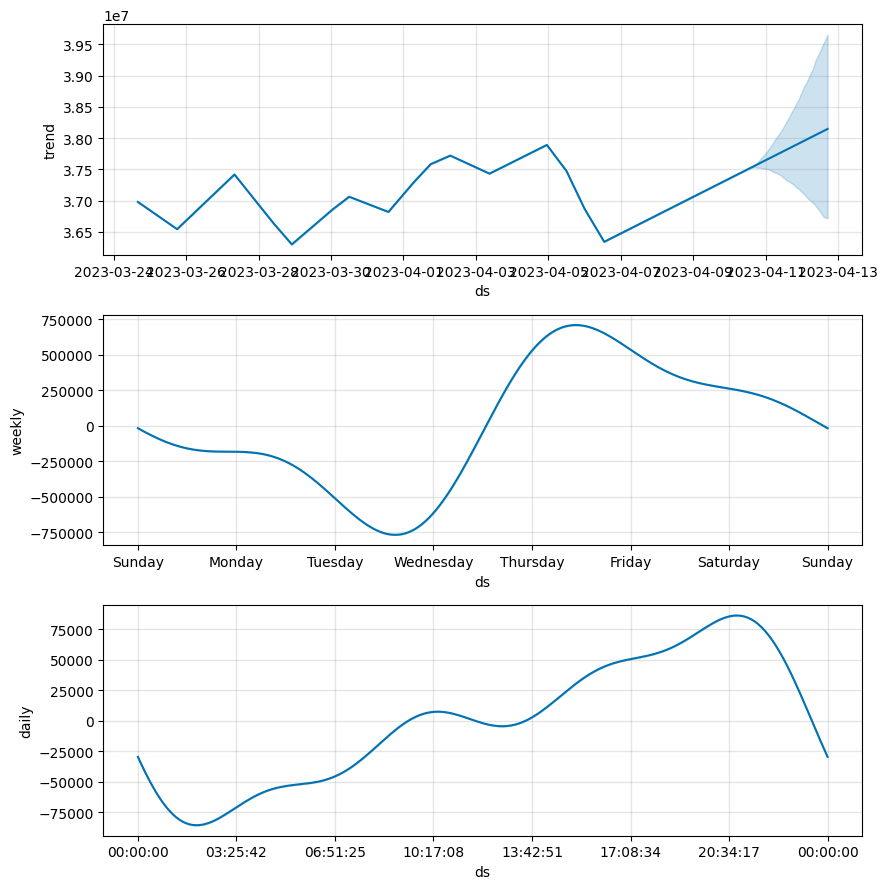

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)